In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os.path
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import preprocessing
import category_encoders as ce

In [2]:
#importing dataset
dataset=pd.read_csv('C:/Users/BadBoy/Desktop/kaggle2/data.csv',low_memory=False)
dataset=dataset.drop("Instance",axis=1)
testset=pd.read_csv('C:/Users/BadBoy/Desktop/kaggle2/test.csv',low_memory=False)
testset=testset.drop("Instance",axis=1)
#merge=pd.concat([dataset,testset])

In [3]:
dataset = dataset.rename(columns={'Year of Record': 'Year'})
dataset = dataset.rename(columns={'Yearly Income in addition to Salary (e.g. Rental Income)': 'Extra'})
dataset = dataset.rename(columns={'Work Experience in Current Job [years]': 'Experience'})
dataset = dataset.rename(columns={'Crime Level in the City of Employement':'Crime'})
dataset= dataset.rename(columns={'Total Yearly Income [EUR]':'Income'})
dataset= dataset.rename(columns={'Body Height [cm]':'Height'})

testset = testset.rename(columns={'Year of Record': 'Year'})
testset = testset.rename(columns={'Yearly Income in addition to Salary (e.g. Rental Income)': 'Extra'})
testset = testset.rename(columns={'Work Experience in Current Job [years]': 'Experience'})
testset = testset.rename(columns={'Crime Level in the City of Employement':'Crime'})
testset = testset.rename(columns={'Total Yearly Income [EUR]':'Income'})
testset = testset.rename(columns={'Body Height [cm]':'Height'})

In [4]:
dataset['Gender'].replace(['f','female'],'female',inplace=True)
testset['Gender'].replace(['f','female'],'female',inplace=True)
#changing Extra column to int by removing EUR
dataset['Extra']=dataset['Extra'].str.replace('\D+','').astype(int)
testset['Extra']=testset['Extra'].str.replace('\D+','').astype(int)

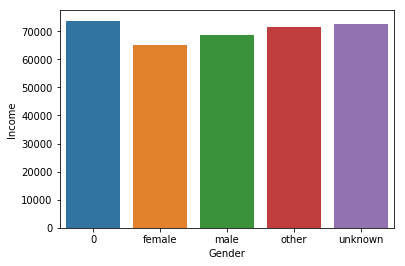

In [5]:

incomePerc = dataset[["Gender", "Income"]].groupby(['Gender'],as_index=False).mean()
sns.barplot(x='Gender', y='Income', data=incomePerc)

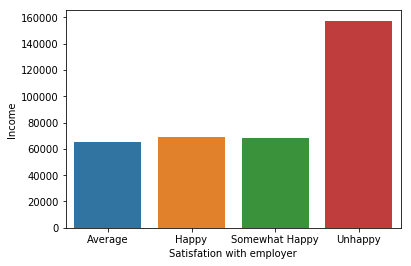

In [6]:

incomePerc = dataset[["Satisfation with employer", "Income"]].groupby(['Satisfation with employer'],as_index=False).mean()
sns.barplot(x='Satisfation with employer', y='Income', data=incomePerc)

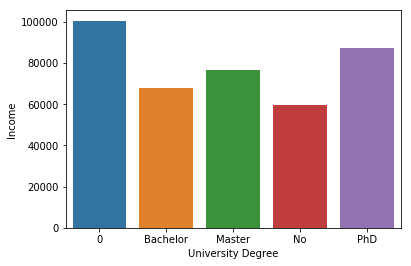

In [7]:

incomePerc = dataset[["University Degree", "Income"]].groupby(['University Degree'],as_index=False).mean()
sns.barplot(x='University Degree', y='Income', data=incomePerc)

In [8]:
print(dataset.isnull().sum())
index_to_drop = dataset[((dataset.Gender == 'unknown') | (pd.isnull(dataset.Gender))) & ((pd.isnull(dataset.Profession)))].index
dataset.drop(index_to_drop,inplace= True)
print(dataset.shape)

Year                          4013
Housing Situation                0
Crime                            0
Experience                       0
Satisfation with employer    38087
Gender                       74127
Age                              0
Country                          0
Size of City                     0
Profession                    2853
University Degree            80600
Wears Glasses                    0
Hair Color                   70211
Height                           0
Extra                            0
Income                           0
dtype: int64
(1048187, 16)


In [9]:
y = dataset['Income']
train_model = dataset.drop(columns =['Income'])
test_model =  testset.drop(columns =['Income'])                                                     
combined_df = pd.concat([train_model, test_model])
print(combined_df.isnull().sum())
print(train_model.shape)
print(test_model.shape)
print(combined_df.shape)

Year                           5492
Housing Situation                 0
Crime                             0
Experience                        0
Satisfation with employer     51485
Gender                       100244
Age                               0
Country                           1
Size of City                      0
Profession                     3507
University Degree            109309
Wears Glasses                     0
Hair Color                    94824
Height                            0
Extra                             0
dtype: int64
(1048187, 15)
(369438, 15)
(1417625, 15)


In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1417625 entries, 0 to 369437
Data columns (total 15 columns):
Year                         1412133 non-null float64
Housing Situation            1417625 non-null object
Crime                        1417625 non-null int64
Experience                   1417625 non-null object
Satisfation with employer    1366140 non-null object
Gender                       1317381 non-null object
Age                          1417625 non-null int64
Country                      1417624 non-null object
Size of City                 1417625 non-null int64
Profession                   1414118 non-null object
University Degree            1308316 non-null object
Wears Glasses                1417625 non-null int64
Hair Color                   1322801 non-null object
Height                       1417625 non-null int64
Extra                        1417625 non-null int32
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 167.6+ MB


In [11]:


combined_df['University Degree'].unique()

array(['No', 'Bachelor', 'Master', nan, 'PhD', '0'], dtype=object)

In [12]:
combined_df['Housing Situation'].unique()

array(['0', 'nA', 'Castle', 'Large House', 'Medium House', 'Small House',
       'Large Apartment', 'Medium Apartment', 'Small Apartment'],
      dtype=object)

In [13]:
combined_df.Gender.unique()

array(['other', 'female', 'male', nan, 'unknown', '0'], dtype=object)

In [14]:
combined_df.Age.describe()

count    1.417625e+06
mean     3.733149e+01
std      1.599372e+01
min      1.400000e+01
25%      2.400000e+01
50%      3.500000e+01
75%      4.800000e+01
max      1.260000e+02
Name: Age, dtype: float64

In [15]:


imp_gender = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Missing')
imp_Satisfation = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Missing')
imp_university = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Missing')
imp_profession = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='Missing')


imp_Satisfation = imp_Satisfation.fit(combined_df[['Satisfation with employer']])
combined_df['Satisfation with employer'] = imp_Satisfation.transform(combined_df[['Satisfation with employer']]).ravel()

imp_gender = imp_gender.fit(combined_df[['Gender']])
combined_df['Gender'] = imp_gender.transform(combined_df[['Gender']]).ravel()

imp_university = imp_university.fit(combined_df[['University Degree']])
combined_df['University Degree'] = imp_university.transform(combined_df[['University Degree']]).ravel()

imp_profession = imp_university.fit(combined_df[['Profession']])
combined_df['Profession'] = imp_university.transform(combined_df[['Profession']]).ravel()

combined_df['Gender'].replace(['0','other','unknown'],'Missing',inplace = True)
combined_df['University Degree'].replace('0','No',inplace = True)
combined_df['Housing Situation'].replace(['0','nA'],'Missing',inplace = True)
avg_year = combined_df["Year"].astype("float").mean(axis=0)
avg_age = combined_df["Age"].astype("float").mean(axis=0)

combined_df["Year"].replace(np.nan, avg_year, inplace=True)
combined_df["Age"].replace(np.nan, avg_age, inplace=True)


combined_df.Experience.replace(["#NUM!"], np.nan, inplace=True)
combined_df['Experience']=combined_df['Experience'].fillna(combined_df.Experience.median())
avg_exp = combined_df["Experience"].astype("float").mean(axis=0)
countries_count_greaterthan100 = combined_df.Country.value_counts()[combined_df.Country.value_counts() > 100]
countrylist = countries_count_greaterthan100.index.tolist()
combined_df.Country.where(combined_df.Country.isin(countrylist),'notimportant',inplace = True)
combined_df.Age.where(combined_df.Age <= 100,109.33,inplace = True)
#decide what to do for unkown gender

In [16]:
combined_df['Experience'].unique()

array(['17', '4.9', '21', '18', '8', '15', '12', '6.3', '13', '14', '22',
       '26', '10', '29', '23', '11', '24', '20', '19', '9', '16', '25',
       '30', '6', '27', '31', '7', '28', '5.6', '34', '35', '33', '38',
       '3.5', '32', '37', '36', '4.2', '4', 15.0, '5', '39', '42', '44',
       '40', '2.8', '41', '3', '2.1', '1.4', '43', '0.7', '45', '0', '48',
       '2', '47'], dtype=object)

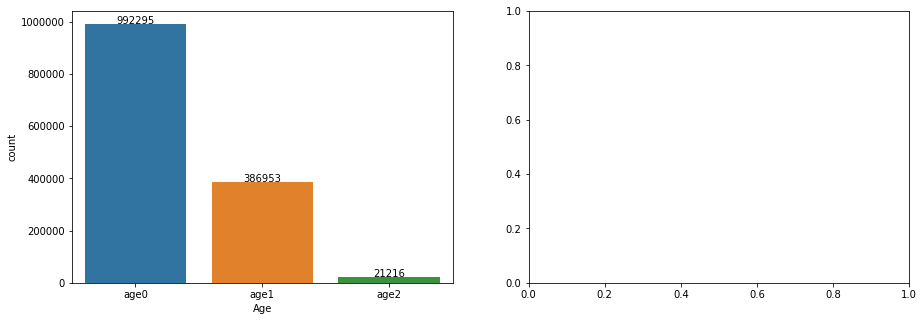

In [17]:
age_bin = np.linspace(min(combined_df["Age"]),max(combined_df["Age"]),4)
age_group = ["age0","age1","age2"]
combined_df["Age_Binned"] = pd.cut(combined_df['Age'], bins=age_bin, labels=age_group)

f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(combined_df['Age_Binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")       
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()



In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler =scaler.fit(combined_df[['Year']])
combined_df['Year'] = scaler.transform(combined_df[['Year']]).ravel()


scaler =scaler.fit(combined_df[['Age']])
combined_df['Age'] = scaler.transform(combined_df[['Age']]).ravel()

scaler =scaler.fit(combined_df[['Crime']])
combined_df['Crime'] = scaler.transform(combined_df[['Crime']]).ravel()

scaler =scaler.fit(combined_df[['Extra']])
combined_df['Extra'] = scaler.transform(combined_df[['Extra']]).ravel()


scaler =scaler.fit(combined_df[['Experience']])
combined_df['Experience'] = scaler.transform(combined_df[['Experience']]).ravel()

scaler =scaler.fit(combined_df[['Height']])
combined_df['Height'] = scaler.transform(combined_df[['Height']]).ravel()

scaler =scaler.fit(combined_df[['Size of City']])
combined_df['Size of City'] = scaler.transform(combined_df[['Size of City']]).ravel()
combined_df.head()

C:\Users\BadBoy\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\BadBoy\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\BadBoy\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Year,Housing Situation,Crime,Experience,Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Height,Extra
0,0.0,Missing,0.160194,0.354167,Unhappy,Missing,0.325186,Afghanistan,0.000503,group head,No,1,Black,0.526316,0.0
1,0.0,Missing,0.121359,0.102083,Unhappy,female,0.031470,Afghanistan,0.045570,heavy vehicle and mobile equipment service tec...,No,0,Blond,0.473684,0.0
2,0.0,Missing,0.165049,0.437500,Unhappy,female,0.356656,Afghanistan,0.016445,sorter,Bachelor,0,Blond,0.326316,0.0
3,0.0,Missing,0.339806,0.375000,Average,female,0.293717,Albania,0.001189,quality control senior engineer,No,1,Brown,0.368421,0.0
4,0.0,Missing,0.247573,0.166667,Happy,Missing,0.010490,Albania,0.000470,logistician,Master,1,Black,0.515789,0.0


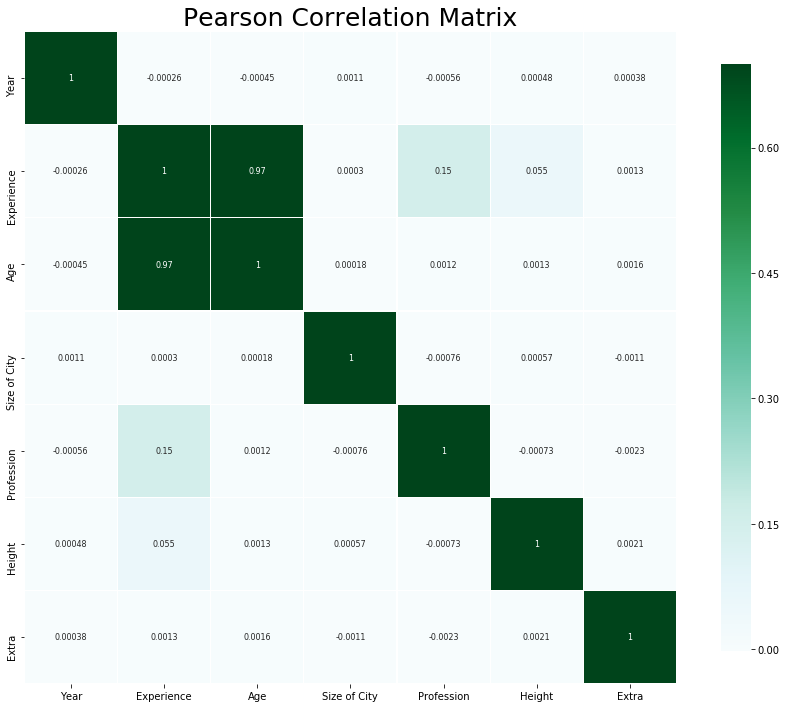

In [18]:
combined_df.drop(columns =['Wears Glasses','Hair Color','Gender','Crime'],inplace= True)

le = preprocessing.LabelEncoder()
combined_df.Profession = le.fit_transform(combined_df.Profession)

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(combined_df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",linecolor='w',annot=True,annot_kws={"size":8},cbar_kws={"shrink": .9});
# encoder = ce.HashEncoder(cols=['Profession'])
# combined_df_onehot_encoded = encoder.fit_transform(combined_df_onehot_encoded)

# combined_df_onehot_encoded.Profession = combined_df_onehot_encoded.Profession.ffill()
combined_df_onehot_encoded = pd.get_dummies(combined_df, columns =['Country','University Degree','Satisfation with employer','Profession','Housing Situation'])

In [19]:
train_X = combined_df_onehot_encoded.iloc[0:1048187, :]
test_X  = combined_df_onehot_encoded.iloc[1048187:, :]
print(train_X.shape)
print(test_X.shape)
print(combined_df_onehot_encoded.shape)

(1048187, 1513)
(369438, 1513)
(1417625, 1513)


In [22]:
reg = RandomForestRegressor(n_estimators=10, random_state=125, min_samples_split=2, n_jobs=-1)
y=np.log(y)
reg.fit(train_X,y)
pred = reg.predict(train_X)
prediction = reg.predict(test_X)

In [20]:
reg = RandomForestRegressor(n_estimators=10, random_state=125, min_samples_split=2, n_jobs=-1)
reg.fit(train_X,y)
pred = reg.predict(train_X)
prediction = reg.predict(test_X)
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y, pred)),'.3f'))
print(rmsecm)

17270.35


In [23]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y, pred)),'.3f'))
print(rmsecm)

0.014


In [ ]:
submit=pd.read_csv('C:/Users/BadBoy/Desktop/kaggle2/submit.csv',low_memory=False)
submit.head(2)

In [ ]:
solution = pd.DataFrame({ 'Instance': submit['Instance'], 'Total Yearly Income [EUR]': prediction })

In [ ]:
solution.to_csv(r'C:/Users/BadBoy/Desktop/kaggle2/sol4.csv',index=False)

In [ ]:
#16174.656